# Esercitazione Richards 1D 
## Modello 1

   #### Matteo De Vincenzi, Chiara Cappelletti, Rosario Famao

Si è considerato un profilo di suolo con i seguenti orizzonti:  
  -strato di sabbia con spessore 1 m   
  -strato di argilla con spessore 2 m.  
Si è posto un ponding in superficie di spessore 0.05 m e il piano di falda a -2.5 m.  
La stratigrafia è visibile nell'immagine sotto: 

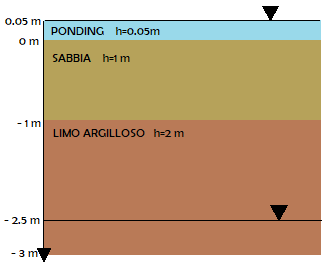

In [0]:
from IPython.display import Image 
Image(filename="Immagine_idromod1.png",width=400,height=400)

E' stato usato nel file sim la condizione al contorno sul fondo di Dirichlet con TestAll_-1 in quanto il flusso con la condizione di Neumann sarebbe risultato troppo grande rispetto all'acqua presente. Inoltre, si è inserita la condizione sulla superficie inserendo come input di precipitazione Tr10_15 min, ovvero un impulso di precipitazione con durata 15 min e tempo di ritorno 10 anni.
La condizione iniziale assegnata è quella idrostatica.
L'equazione differenziale di Richards è stata descritta con la parametrizzazione di Van Genuchten e quindi prima della creazione delle mesh, sono stati inseriti i parametri necessari nella tabella visibile qui sotto:

In [0]:
import os
import pandas as pd

data = pd.read_csv("esercitazione2.csv")
#print(data.head())
#print(data.index)
#print(data.columns)
data

,Type,eta,N,psi,thetaS,thetaR,Ks,n,alpha,alphaSpecificStorage,betaSpecificStorage,et
0,L,0,20.0,0.05,0.38,0.02,0.003697,1.70,1.47,0.0,0.0,0.0
1,L,-1,40.0,NaN,0.44,0.04,0.000002,1.24,5.88,0.0,0.0,0.0
2,L,-3,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
%%capture
%run Richards1DOutput.py   #nella stessa cartella dello script python!!!!!!!!!!!!!!!

#from netCDF4_classic import Dataset
from netCDF4 import Dataset


import os

## pandas
import pandas as pd

## numpy
import numpy as np

## plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#import matplotlib.transforms as transforms
#import matplotlib.gridspec as gridspec
#import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.ticker as mtick

## to convert unix time to human readable date
import time
import datetime

#################
# Plot settings #
#################

labelSize = 20
titleSize = 22
legendSize = 20
axisTicksSize = 18

lineWidth = 0.6
lineStyle ='-'

markerSize = 6
markerType = 'o'

figureSizeHeigth = 13
figureSizeWidth = 15
figureSizeHeigth1 = 13
figureSizeWidth1 = 20

In [0]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import BoxSelectTool
from bokeh.models import HoverTool

output_notebook()

Loading BokehJS ...

# Richards 1D: input


Here you can read the .csv file used to create the grid. 
This file is used to plot layers limits in water content plots.

Set in

                               your_path/data/RichardsMeshGen_input

In [0]:
os.chdir("C:\\Users\\MATTEO\\Desktop\\OMS_Project_Richards1D-master\\data\\RichardMeshGen_input")
os.listdir()

['.ipynb_checkpoints',
 'ClaySand_noPonding_VG.csv',
 'ClaySand_noPonding_VG.PNG',
 'Clay_noPonding_BC.csv',
 'Clay_noPonding_Kosugi.csv',
 'Clay_noPonding_Romano.csv',
 'Clay_noPonding_VG.csv',
 'Clay_noPonding_VG.PNG',
 'Clay_noPonding_VG_1.csv',
 'esercitazione2.csv',
 'SandClay_01Ponding_Measurement_VG.csv',
 'SandClay_01Ponding_Measurement_VG.PNG',
 'SandClay_1.csv',
 'SandClay_1.PNG',
 'Sand_01Ponding_VG.csv',
 'Sand_01Ponding_VG.PNG']

In [0]:
data = pd.read_csv("esercitazione2.csv")

## Precipitazione

- Tempo di ritorno 10 anni
- Durata 15 minuti
- Cumulata 26 mm
- Intensità 0.028 mm/s


In [0]:
os.chdir("../Timeseries")
os.listdir()

['.ipynb_checkpoints',
 'Rovereto7gg.csv',
 'Rovereto7ggBottom.csv',
 'TestAll_-1.csv',
 'TestAll_-10.csv',
 'TestAll_-20.csv',
 'TestAll_-50.csv',
 'TestAll_0.csv',
 'TestAll_05.csv',
 'TestAll_2.csv',
 'TestAll_2_BottomNeumann.csv',
 'TestAll_2_Gradino12ore.csv',
 'TestAll_2_Gradino3ore.csv',
 'TestAll_4.csv',
 'Tr10_10ore.csv',
 'Tr10_15min.csv',
 'Tr10_30min.csv',
 'Trento7gg.csv',
 'Trento7ggBottom.csv']

In [0]:
rain = pd.read_csv("Tr10_15min.csv",skiprows=5,parse_dates=[1],header=1,low_memory=False)
rain = rain.drop(['Format'],axis=1)
rain.columns.values[0] = 'Datetime'
rain.columns.values[1] = 'mm'
rain.set_index('Datetime', inplace = True)
rain['mm/s'] = rain['mm']/300
rain.head()

,mm,mm/s
Datetime,,
2017-01-01 00:00:00,0.0,0.0
2017-01-01 00:05:00,0.0,0.0
2017-01-01 00:10:00,0.0,0.0
2017-01-01 00:15:00,0.0,0.0
2017-01-01 00:20:00,0.0,0.0


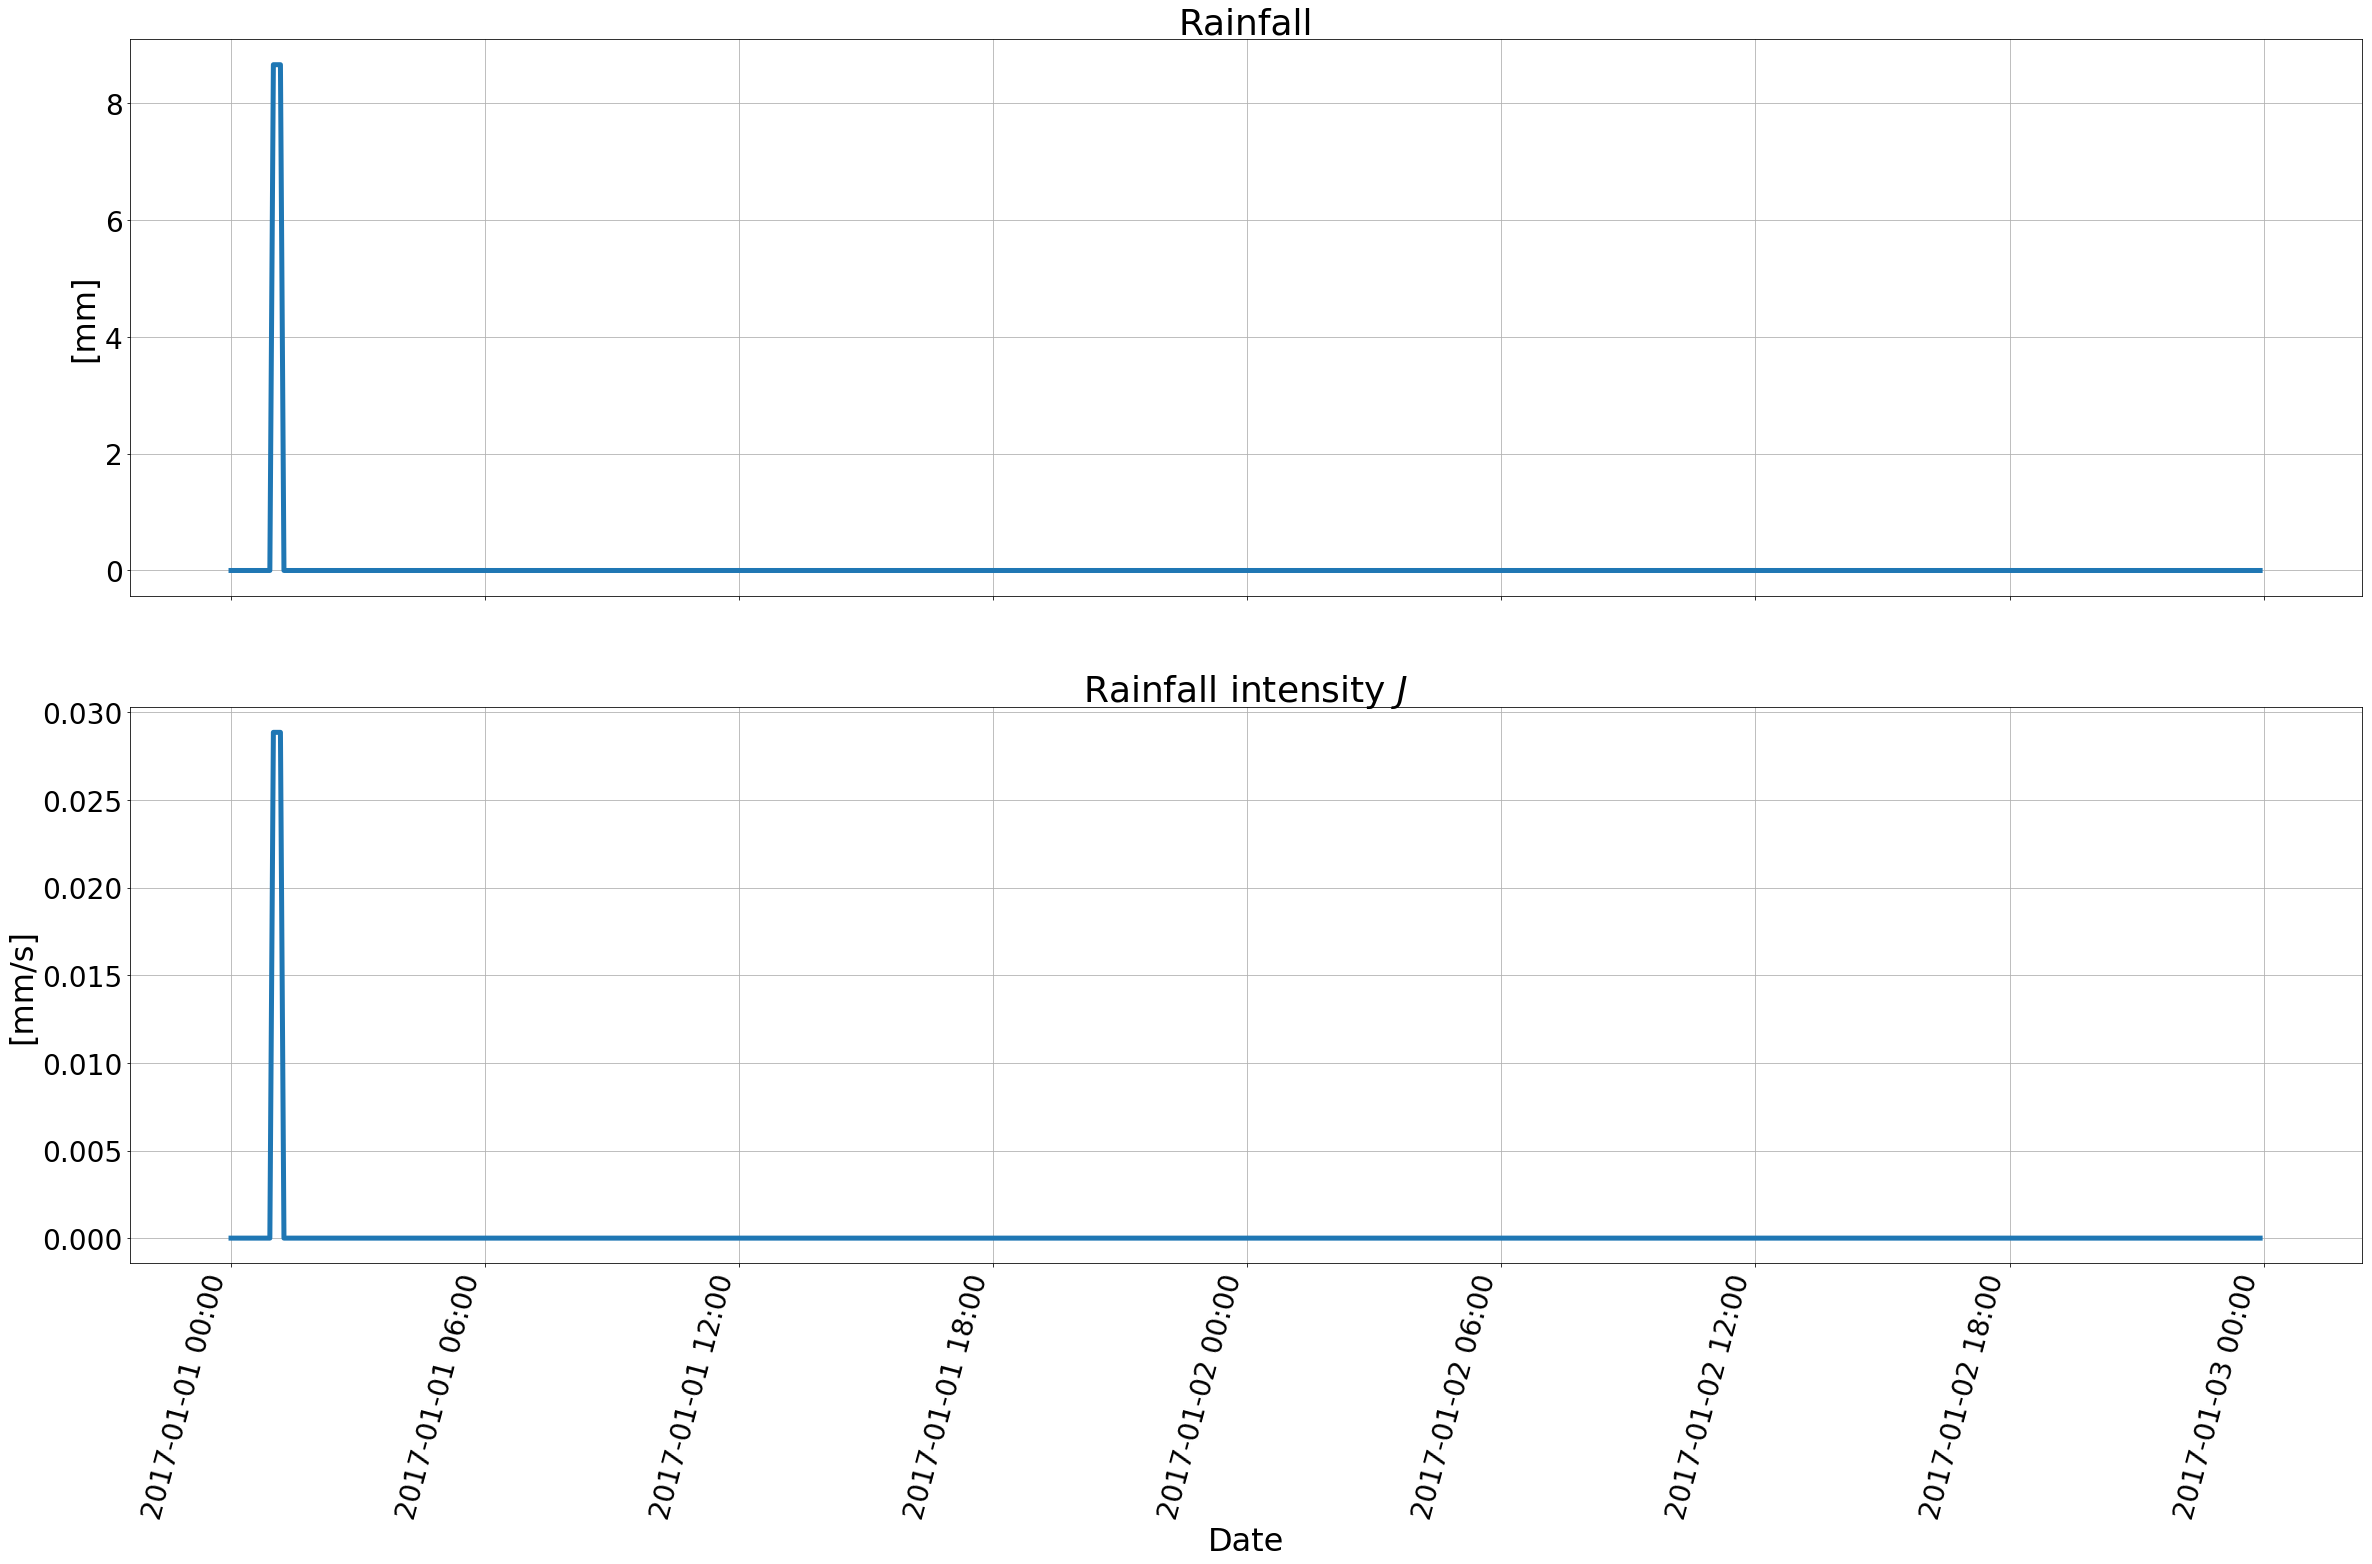

In [0]:
fig = plt.figure(figsize=(40,25))
ax = plt.subplot(211)
ax.plot(rain.index, rain['mm'],linewidth=5)
plt.xlabel('Date',fontsize=32)
plt.ylabel('[mm]',fontsize=32)   
plt.title('Rainfall',fontsize=36)
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
xlabels = ax.get_xticklabels()
ax.xaxis.get_major_ticks()
for label in xlabels:
    label.set_rotation(75)
    label.set_fontsize(28)
    
ylabels = ax.get_yticklabels()
for label in ylabels:
    label.set_fontsize(28)
plt.grid()

ax1 = plt.subplot(212)
ax1.plot(rain.index, rain['mm/s'],linewidth=5)
plt.xlabel('Date',fontsize=32)
plt.ylabel('[mm/s]',fontsize=32)   
plt.title('Rainfall intensity $J$',fontsize=36)
fig.autofmt_xdate()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
xlabels = ax1.get_xticklabels()
ax1.xaxis.get_major_ticks()
for label in xlabels:
    label.set_rotation(75)
    label.set_fontsize(28)
    
ylabels = ax1.get_yticklabels()
for label in ylabels:
    label.set_fontsize(28)
plt.grid()
plt.show()

# Richards 1D: outputs

Here you can read the output of your simulation (.nc). 

Set in

                            your_path/output

In [0]:
os.chdir("C:\\Users\\MATTEO\\Desktop\\OMS_Project_Richards1D-master\\output")
os.listdir()

['Clay_noPonding_VG.nc',
 'Clay_noPonding_VG_1.nc',
 'Clay_VG.nc',
 'Integrate PDE',
 'output_esercitazione2Dirichlet.nc',
 'output_SandClay_1.nc']

In [0]:
fileName = 'output_esercitazione2Dirichlet.nc'

## Import your NetCDF file and store all data in appropriate variables

In [0]:
[ncfile,depths,dualDepths,time,psi,theta,iC,darcyVelocities,darcyVelocitiesCapillary,darcyVelocitiesGravity,celerities,kinematicRatio,error,runOff,dates,datesHuman,topBC_DF,bottomBC_DF] = readRichardsOutputNetCDF(fileName)

*** SUCCESS reading

 ***FILE INFO:

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Description_of_the_problem: grid:  esercitazione2.csv, esercitazione2.nc topBC Tr10_15min.csv, bottomBC Dirichlet TestAll_-1, deltaT 300s
    dimensions(sizes): depth(61), dualDepth(61), time(289)
    variables(dimensions): float64 depth(depth), float64 dual_depth(dualDepth), int32 time(time), float64 psi(time,depth), float64 psiIC(depth), float64 water_heigth(time,depth), float64 darcyVelocities(time,dualDepth), float64 darcyVelocitiesCapillary(time,dualDepth), float64 darcyVelocitiesGravity(time,dualDepth), float64 poreVelocities(time,dualDepth), float64 celerities(time,dualDepth), float64 kinematicRatio(time,dualDepth), float64 error(time), float64 topBC(time), float64 bottomBC(time), float64 runOff(time)
    groups: 



## Plot results
The solution is time dependent,thus to show the solution at a certain time you can define the timeIndex variable (i.e. the number of the time step: 0 is the first time step coincedent with the the start date of your simulation, 1 is the second one and so on), or define myDate (i.e. day and time you are interested in) 

In [0]:
## Enter the dates [yyyy-MM-dd HH:mm] you want to plot inserisco data e ora dei risulati che voglio, più curve dunque
myDate = ['2017-01-01 00:00', '2017-01-01 00:30','2017-01-01 01:00', '2017-01-01 01:10','2017-01-01 04:00']
timeIndex = []
for i in range(0,len(myDate)):
    timeIndex = np.append(timeIndex,datesHuman.index(myDate[i]))
date = myDate
for d in date:
    print('Considero la soluzione per '+ d) 

Considero la soluzione per 2017-01-01 00:00
Considero la soluzione per 2017-01-01 00:30
Considero la soluzione per 2017-01-01 01:00
Considero la soluzione per 2017-01-01 01:10
Considero la soluzione per 2017-01-01 04:00


In [0]:
## enter the time index you want to plot
#timeIndex = 0;

#date = datetime.datetime.fromtimestamp(time[timeIndex])
#date

### Plot initial condition

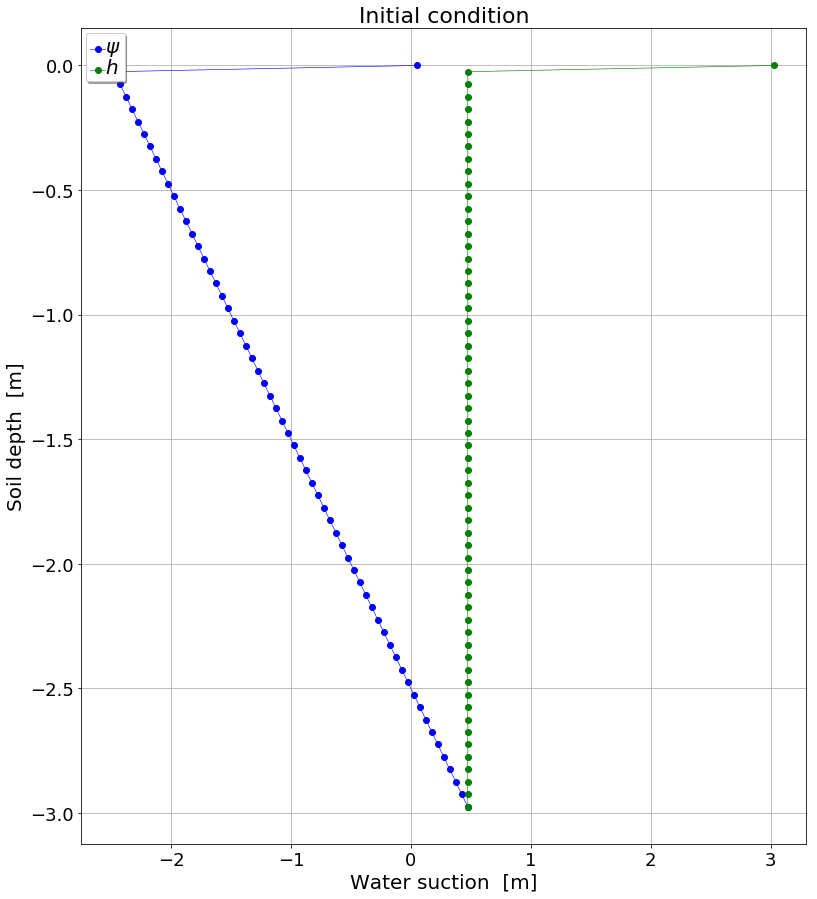

In [0]:
showInitialCondition(iC,depths,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,"upper left")

### Plot water suction

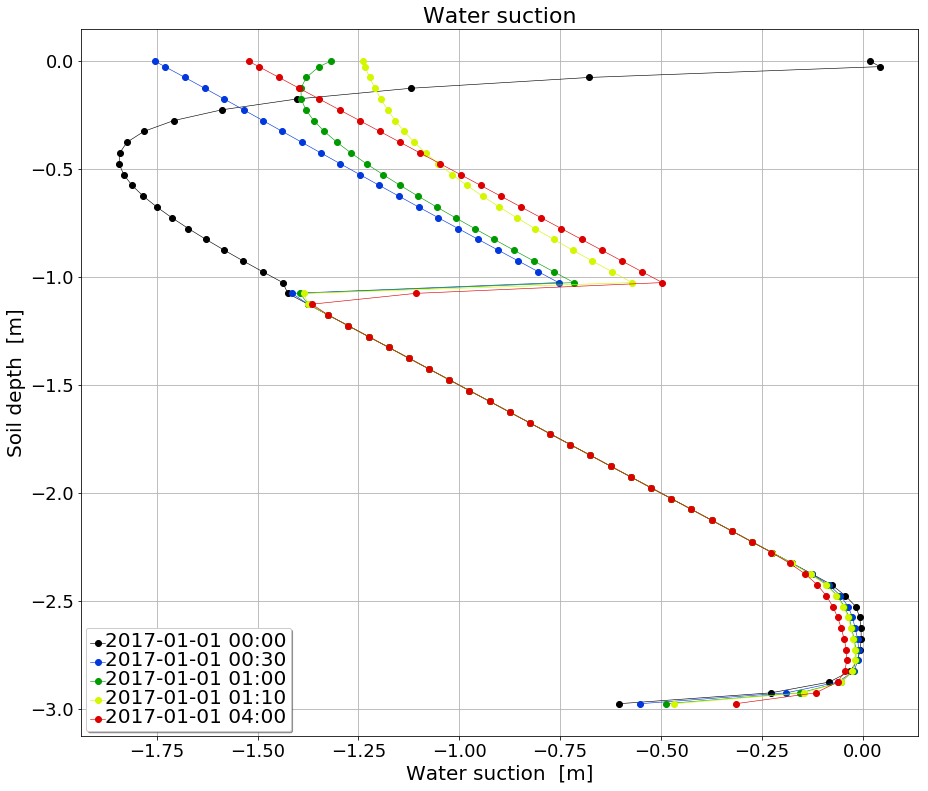

In [0]:
showWaterSuction(timeIndex,date,psi,depths,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,'lower left')


Dal grafico sopra si nota una pressione che inizialmente è circa 0 in superficie, con terreno superficialmente saturo dovuto al ponding. Dopo soli 30 minuti dall'avvio della simulazione, la suzione si assesta su un andamento rettilineo. Quando inizia a piovere le curve si spostano verso destra per l'infiltrazione di acqua dovuta alla pioggia e subito dopo la fine dell'evento ritornano rette. Dalle ore 4 in poi non si hanno cambiamenti significativi perchè è stata già raggiunta la condizione idrostatica. All'interfaccia con lo strato di argilla si nota un aumento di pressione dovuto all'accumulo di acqua che si è infiltrata facilmente nella sabbia mentre trova difficoltà a oltrepassare l'argilla.   

### Plot hydraulic head
Is the hydraulic head $\psi + z$ that drives the water flow

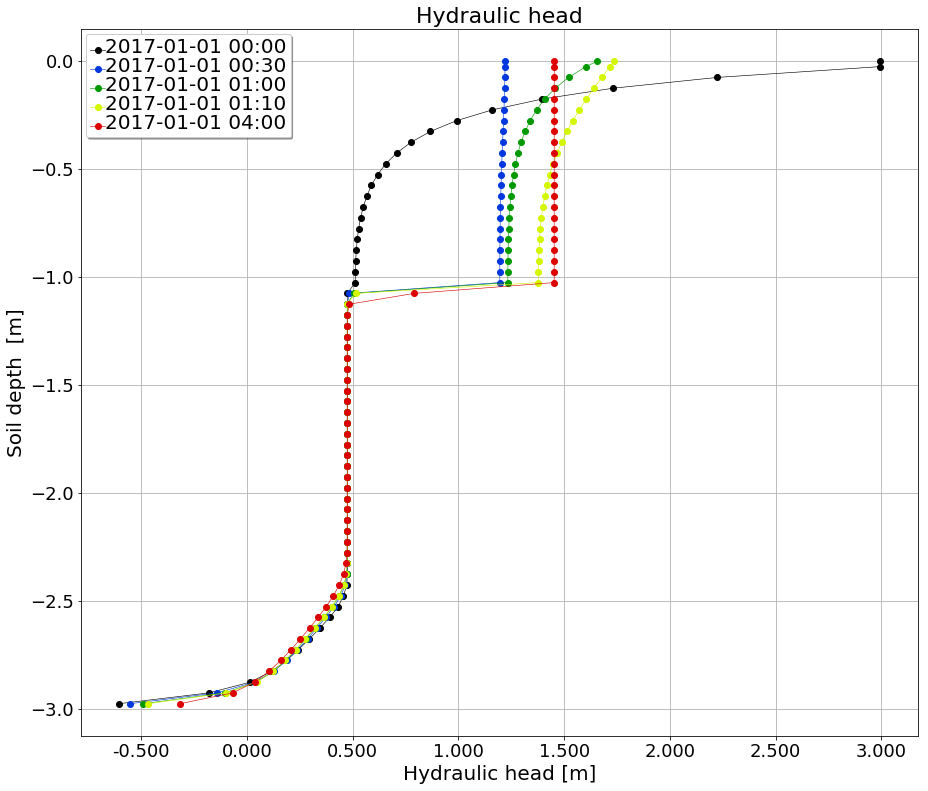

In [0]:
showHydraulicHead(timeIndex,date,psi,depths,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,'upper left')


Le rette verticali nella sabbia sono profilii idrostatici, dove quindi il carico idraulico è costante perchè la conducibilità idraulica è molto maggiore rispetto a quella dell'argilla e quindi le perdite di carico trascurabili. 

### Plot water content and water depth

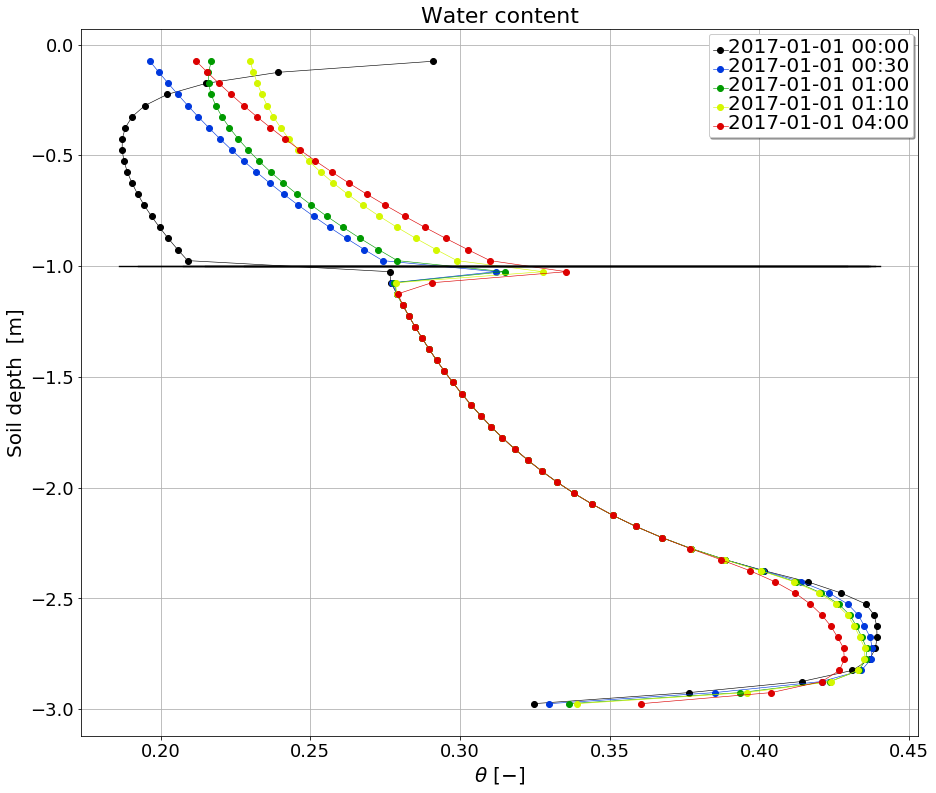

In [0]:
showWaterContent(timeIndex,date,theta,depths,data,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,'upper right')


Si vede una discontinuità nel contenuto d'acqua in corrispondenza dell'interfaccia tra i due strati, dovuta alla diversa tessitura dei terreni.

### Velocities

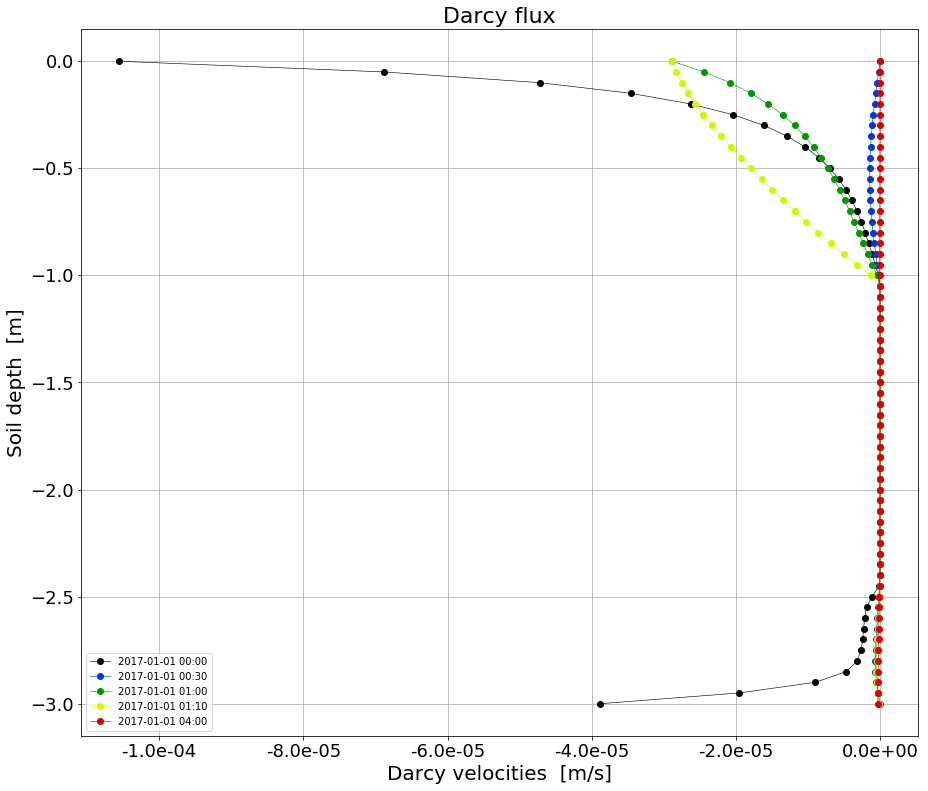

In [0]:
showDarcyVelocities(timeIndex,date,darcyVelocities,dualDepths,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,'upper left')


questi flussi sono calcolati con k*dy/dz + k*dz/dz

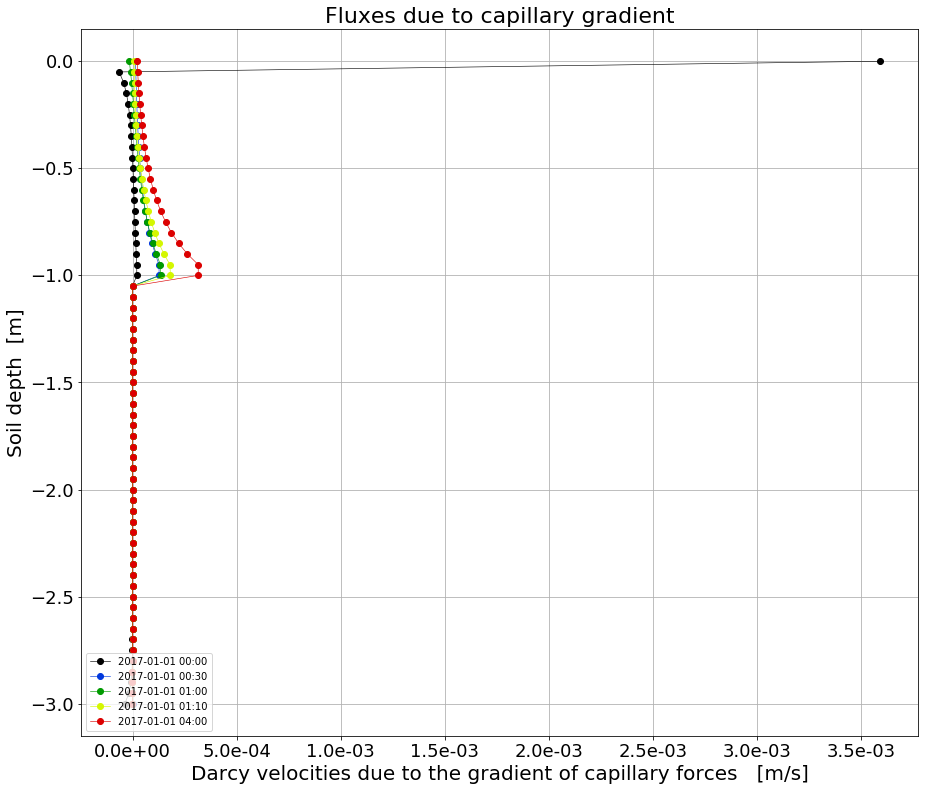

In [0]:
showCapillaryVelocities(timeIndex,date,darcyVelocitiesCapillary,dualDepths,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,'upper left')


questi flussi sono calcolati con solo k*dy/dz la capillarità porta verso l'alto

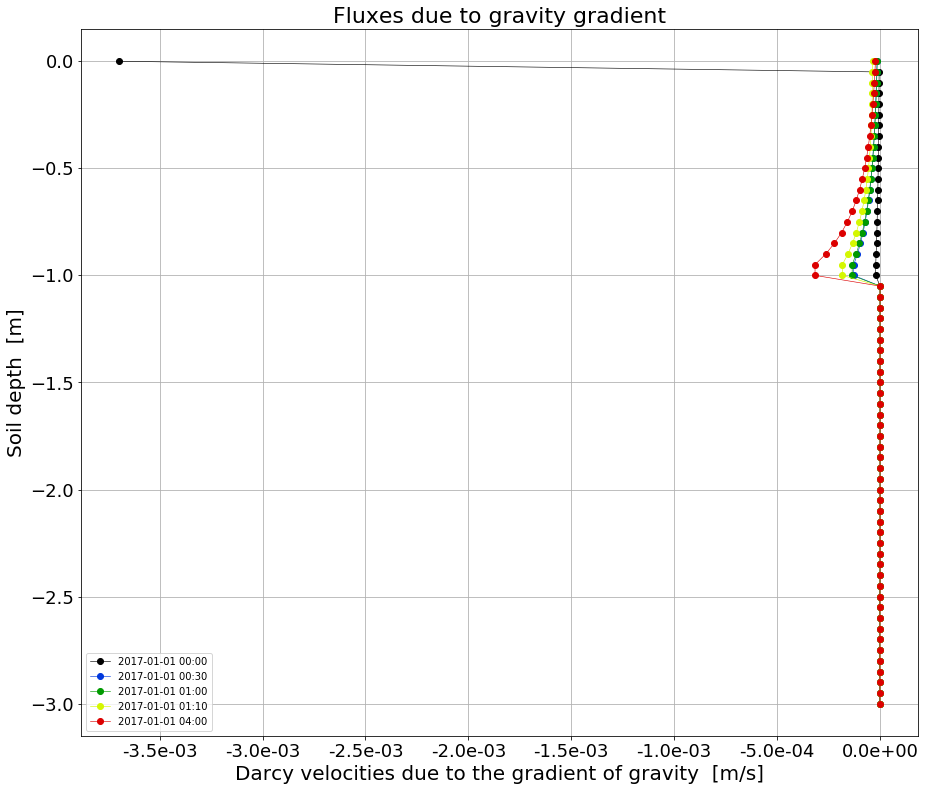

In [0]:
showGravityVelocities(timeIndex,date,darcyVelocitiesGravity,dualDepths,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,'upper left')


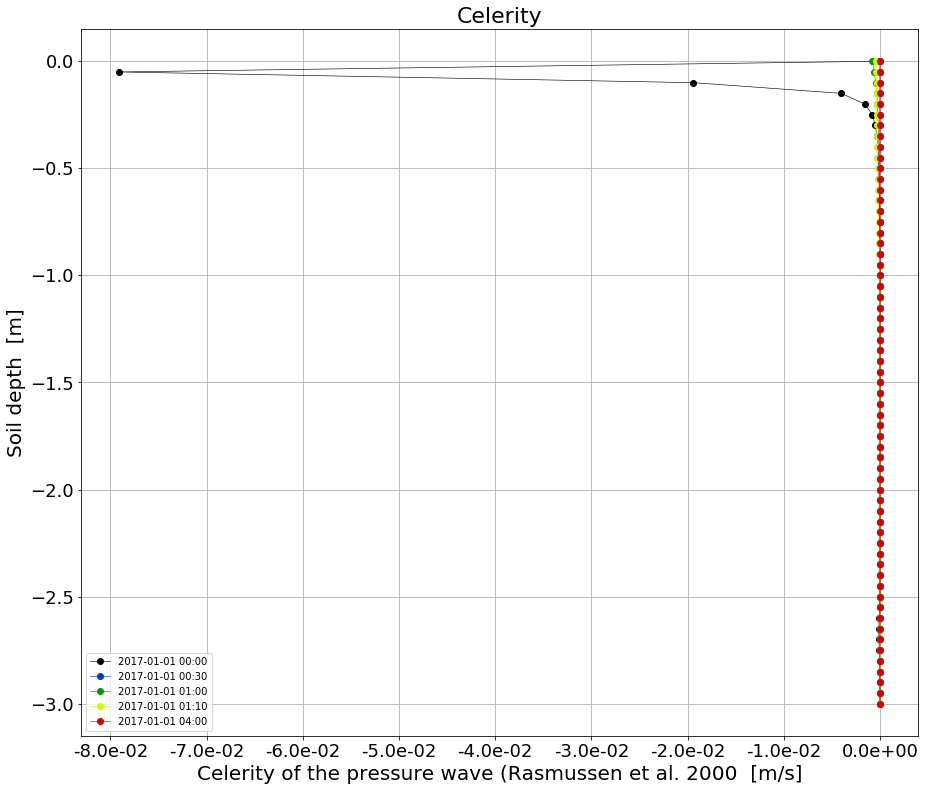

In [0]:
showCelerities(timeIndex,date,celerities,dualDepths,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,'upper left')


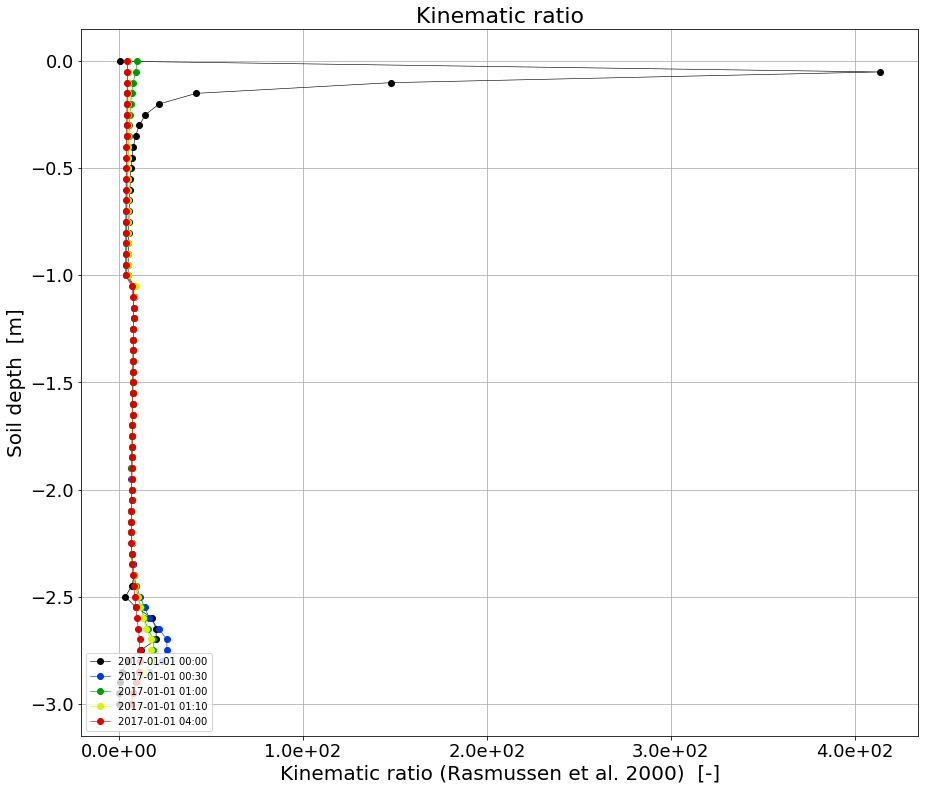

In [0]:
showKinematicRatio(timeIndex,date,kinematicRatio,dualDepths,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,'upper left')

### Some plots with bokeh package

In [0]:
date = '2017-01-01 01:00'
timeIndex = datesHuman.index(date)
timeIndex

12

In [0]:
## https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#built-in-tools

hover = HoverTool(tooltips=[
    ("(x,y)", "($x, $y)"),
])

p1 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")

p1.scatter(psi[timeIndex,:], depths[:], color="blue")
p1.xaxis.axis_label = ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']'
p1.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p1.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p1.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p1.title.text = 'Date: '+date
p1.title.align = "center"
p1.title.text_font_size = str(titleSize) + "px"
tab1 = Panel(child=p1, title="Water suction")

p2 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")

p2.scatter(psi[timeIndex,:]+depths[:]-depths[0], depths[:], color="blue")
p2.xaxis.axis_label = 'Hydraulic head [m]'
p2.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p2.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p2.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p2.title.text = 'Date: '+date
p2.title.align = "center"
p2.title.text_font_size = str(titleSize) + "px"
tab2 = Panel(child=p2, title="Hydraulic head")

p3 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")
p3.scatter(theta[timeIndex,0:depths[:].shape[0]-2],depths[0:depths[:].shape[0]-2], color="red",legend='\u03B8 ')
p3.line([np.min(theta[timeIndex,0:np.size(theta[timeIndex,])-1])-0.001,np.max(theta[timeIndex,])+0.001], [theta[timeIndex,depths[:].shape[0]-1],theta[timeIndex,depths[:].shape[0]-1]], color="deepskyblue",line_width=lineWidth, legend='Total water level')
for i in range(1,np.size(data.index)-1):
    if data['Type'][i] == 'L':
        c = 'black'
        l = 'layer'
        p3.line([np.min(theta[timeIndex,0:np.size(theta[timeIndex,])-1])-0.001,np.max(theta[timeIndex,])+0.001], [data['eta'][i],data['eta'][i]], color=c,line_width=lineWidth-2,legend='Layer')

p3.legend.location = "bottom_right"
p3.legend.label_text_font_size = str(legendSize) + "px"
p3.legend.click_policy="hide"
#p3.xaxis.axis_label = '\u03B8 [-]'
p3.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p3.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p3.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p3.title.text = 'Date: '+date
p3.title.align = "center"
p3.title.text_font_size = str(titleSize) + "px"
tab3 = Panel(child=p3, title="Water content and water depth")

p4 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")

p4.scatter(darcyVelocities[timeIndex], dualDepths[:], color="black")
p4.xaxis.axis_label = ncfile.variables['darcyVelocities'].long_name + '  [' +ncfile.variables['darcyVelocities'].units +']'
p4.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p4.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p4.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p4.title.text = 'Date: '+date
p4.title.align = "center"
p4.title.text_font_size = str(titleSize) + "px"
tab4 = Panel(child=p4, title="Darcy velocities")

tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4 ])
show(tabs)

In [0]:
#ncfile.close()